<h1> Assignment - 3</h1>
<p> Two examples of daily scrum meetings(Youtube Videos) </p>
<p><a href="https://www.youtube.com/watch?v=kKIc1NFO-AU"><i>1. Link-1 </i></a></p>
<p><a href="https://www.youtube.com/watch?v=DJ-HXD2MImg"><i>2. Link-2 </i></a></p>

<h3><b> Important Points: </b></h3>
<p> 1. Each member in the meeting should speak for one minute for a structed meeting </p>
<ul>
    <li> What have they done since last meeting?</li>
    <li> What do they plan to do till the next meeting?</li> 
    <li> What are the impediments?</li>
</ul>
<h3><b>Tasks:</b></h3>
<h2> Task 1 </h2>
<p> 1.  First, get the audio of one stand-up meeting and cluster the audio based on the features of team members voice </p>
<p> 2. This task is to come up with a score to show the quality of meeting in terms of structure</p>
<h2> Task 2 </h2>
<p> 1.  Using NLP modules available in python, cluster the speech of each speaker into three segments.</p>
<p> 2. Using a similarity measure, create three following clusters for the whole meeting:</p>
<ul>
    <li> work has been done</li>
    <li> work planned to do</li> 
    <li> reported issues</li>
</ul>

<h1> Task - 1</h1>

<h1> Importing Libraries </h1>

In [1]:
import moviepy.editor as mp
from pandas import DataFrame
import numpy as np
import pandas as pd
import librosa
import librosa.display 
import IPython.display as ipd
from pydub import AudioSegment
from pydub.playback import play
from playsound import playsound
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import homogeneity_score, v_measure_score, completeness_score
import speech_recognition as sr
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/j/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h1> Converting a Video File into an Audio File and saving it </h1>

In [2]:
#Converting the Video File into an Audio File using moviepy.editor
clip = mp.VideoFileClip(r"Standup1.mp4")
clip.audio.write_audiofile(r"Standup1.wav")

chunk:   1%|▏         | 102/7798 [00:00<00:08, 940.99it/s, now=None]

MoviePy - Writing audio in Standup1.wav


MoviePy - Done.


<h1> Loading the converted audio file </h1> 

In [1]:
scrum = "Standup1.wav"

<h3>Calculate the duration of the audio in seconds </h3>

In [4]:
#Calculate and print the duration of the complete in seconds
f, sr = librosa.load(scrum)
samples = len(f)
seconds = samples/sr
seconds

353.62

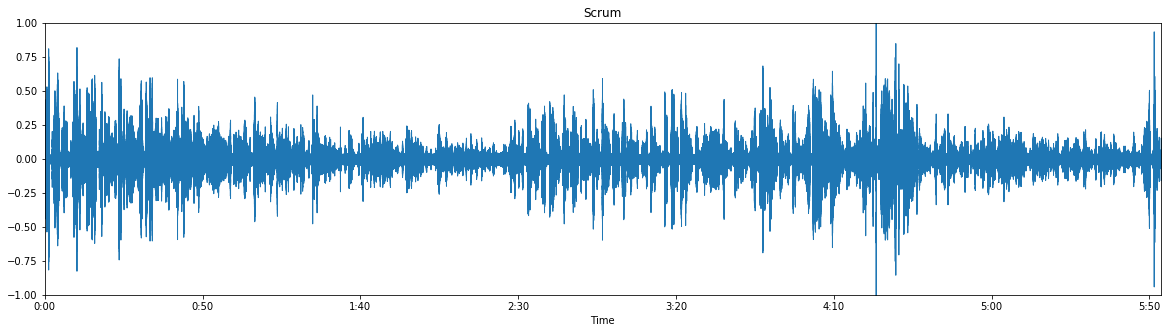

In [5]:
#displaying the waveforms
plt.figure(figsize=(20,17))
plt.subplot(3,1,1)
librosa.display.waveplot(f)
plt.ylim((-1,1))
plt.title("Scrum")
plt.show()

<h3> Splitting 1 audio file into multiple audio files consisting duration of 1 minute each </h3>

In [6]:
#function to split the audio into multiple chunks consisting of 1 minute each
def segment(df):
    li = []
    sMin = 0
    sSec = 0
    eMin = 1
    eSec = 0
    for i in np.arange(0,df,60):
        startTime = sMin*60*1000+sSec*1000
        endTime = eMin*60*1000+eSec*1000
        extract = f[startTime:endTime]
        li.append(extract)
        sMin = sMin + 1;
        eMin = eMin + 1;
    return li

In [7]:
#calling the segment function to split the audio files
seg = segment(seconds)
seg

[array([ 0.        ,  0.        ,  0.        , ..., -0.04507066,
        -0.0464687 , -0.05119315], dtype=float32),
 array([-0.04744233, -0.03969515, -0.03730704, ...,  0.01275566,
         0.0161323 ,  0.00243492], dtype=float32),
 array([-0.00741029, -0.00747941, -0.00744929, ..., -0.04966446,
        -0.05481369, -0.04562755], dtype=float32),
 array([-0.04688509, -0.04131447, -0.03562804, ...,  0.04081686,
         0.06329042,  0.07500574], dtype=float32),
 array([ 0.0750804 ,  0.07710095,  0.06582792, ..., -0.09192409,
        -0.08687458, -0.18105094], dtype=float32),
 array([-0.1841267 , -0.08197571, -0.006194  , ...,  0.00128776,
         0.00566694,  0.0092049 ], dtype=float32)]

<h1> Feature Extraction from audio signal </h1>
<h3> List of features </h3>
<p> 1. MFCC </p>
<p> 2. SPECTRAL ROLLOFF </p>
<p> 3. CHROMA CQT </p>
<p> 4. RMS </p>
<p> 5. ZERO CROSSING RATE </p>

In [8]:
mfccs_arr = []
spectral_rolloff_arr = []
chroma_cqt_arr = []
spectral_centroid_arr = []
rms_arr = []
zero_crossing_rate_arr = []
for i in range(len(seg)):
    sig = np.array(seg[i]).astype(np.float32)
    mfccs = librosa.feature.mfcc(sig, sr=sr)
    mfccs_1 = np.mean(mfccs,1)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(sig)
    zero_crossing_rate_1 = np.mean(zero_crossing_rate,1)
    spectral_rolloff = librosa.feature.spectral_rolloff(sig, sr=sr)
    spectral_rolloff_1 = np.mean(spectral_rolloff,1)
    chroma_cqt = librosa.feature.chroma_cqt(sig, sr=sr)
    chroma_cqt_1 = np.mean(chroma_cqt,1)
    spectral_centroid = librosa.feature.spectral_centroid(sig, sr=sr)
    spectral_centroid_1 = np.mean(spectral_centroid,1)
    rms = librosa.feature.rms(sig)
    rms_1 = np.mean(rms,1)
    mfccs_arr.append(mfccs_1)
    zero_crossing_rate_arr.append(zero_crossing_rate_1)
    spectral_rolloff_arr.append(spectral_rolloff_1)
    chroma_cqt_arr.append(chroma_cqt_1)
    spectral_centroid_arr.append(spectral_centroid_1)

In [9]:
spectral_rolloff_arr

[array([5144.88442631]),
 array([5083.56954284]),
 array([5572.08127814]),
 array([5131.56303794]),
 array([6142.61991856]),
 array([5833.94692631])]

<h1> Audio Feature Visualization: </h1>

<h3> MFCC: </h3>

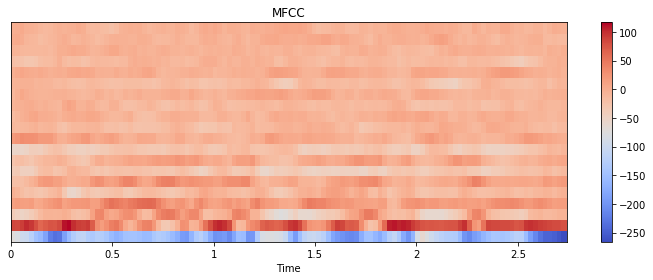

In [10]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

<h3>Chroma CQT:</h3>

Text(0.5, 1.0, 'Chroma')

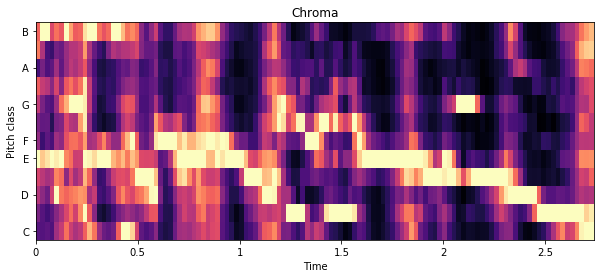

In [11]:
plt.figure(figsize=(10, 4))
img = librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time')
plt.title('Chroma')

<h3> Spectral Centroids: </h3>

[Text(0.5, 1.0, 'log Power spectrogram')]

<Figure size 720x288 with 0 Axes>

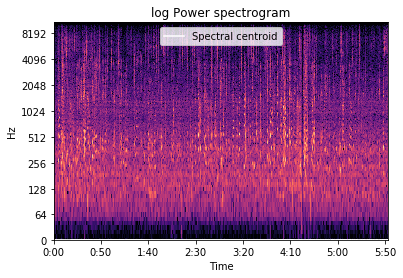

In [12]:
S, phase = librosa.magphase(librosa.stft(y=f))
freqs, times, D = librosa.reassigned_spectrogram(f, fill_nan=True)
plt.figure(figsize=(10, 4))
times = librosa.times_like(f)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, f.T, label='Spectral centroid', color='w')
ax.legend(loc='upper center')
ax.set(title='log Power spectrogram')

<h3> Creating individual dataframe for each feature </h3>

In [13]:
#creating separate dataframes for each feature and transforming the array of values in each faature to a list
#displaying the values of one feature
mfccs_arr_data = pd.DataFrame({'features': mfccs_arr})
df_mfccs = pd.DataFrame(mfccs_arr_data.features.values.tolist(), index = mfccs_arr_data.index )

spectral_rolloff_arr_data = pd.DataFrame({'features': spectral_rolloff_arr})
df_spectral_rolloff = pd.DataFrame(spectral_rolloff_arr_data.features.values.tolist(), index = spectral_rolloff_arr_data.index )

chroma_cqt_arr_data = pd.DataFrame({'features': chroma_cqt_arr})
df_chroma_cqt = pd.DataFrame(chroma_cqt_arr_data.features.values.tolist(), index = chroma_cqt_arr_data.index )

spectral_centroid_arr_data = pd.DataFrame({'features': spectral_centroid_arr})
df_spectral_centroid = pd.DataFrame(spectral_centroid_arr_data.features.values.tolist(), index = spectral_centroid_arr_data.index )

rms_arr_data = pd.DataFrame({'features': rms_arr})
df_rms = pd.DataFrame(rms_arr_data.features.values.tolist(), index = rms_arr_data.index )

zero_crossing_rate_arr_data = pd.DataFrame({'features': zero_crossing_rate_arr})
df_zero_crossing_rate = pd.DataFrame(zero_crossing_rate_arr_data.features.values.tolist(), index = zero_crossing_rate_arr_data.index )

mfccs_arr_data

,features
0,"[-250.05714, 87.09834, -7.9378138, 21.733318, ..."
1,"[-177.09915, 83.77684, -18.977987, 22.115139, ..."
2,"[-216.09961, 85.200005, -4.3007007, 17.350311,..."
3,"[-130.29797, 78.43633, -17.287872, 22.287884, ..."
4,"[-173.13718, 68.881714, -4.6215577, 18.410896,..."
5,"[-153.25003, 59.88037, -10.119243, 23.228222, ..."


In [14]:
#concatenating all the dataframes with different features in it
df_final = pd.concat([df_mfccs,df_spectral_rolloff,df_chroma_cqt, df_spectral_centroid,df_rms,df_zero_crossing_rate], ignore_index=True, axis = 1)
df_final

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-250.057144,87.098343,-7.937814,21.733318,-2.302378,3.553228,-11.419223,2.845475,-23.026539,-0.494685,...,0.564590,0.545742,0.514215,0.532236,0.419860,0.457430,0.611020,0.475658,2502.336694,0.128517
1,-177.099152,83.776840,-18.977987,22.115139,-6.494556,4.274517,-22.442966,0.590565,-27.535898,3.763030,...,0.514482,0.518633,0.570491,0.604697,0.528220,0.495347,0.594039,0.585834,2662.991621,0.164778
2,-216.099609,85.200005,-4.300701,17.350311,-3.985563,14.017991,-23.213362,1.999225,-22.826685,0.901367,...,0.532049,0.478358,0.475825,0.534474,0.383485,0.412277,0.483843,0.521462,2542.046700,0.119103
3,-130.297974,78.436333,-17.287872,22.287884,-9.304369,8.157413,-22.811209,-13.920866,-34.999599,0.850910,...,0.533943,0.459866,0.464823,0.652489,0.412376,0.365764,0.315723,0.510561,2654.689117,0.152952
4,-173.137177,68.881714,-4.621558,18.410896,-4.873506,10.773917,-23.759352,-3.486451,-28.697701,6.528072,...,0.476438,0.421005,0.472341,0.565859,0.432615,0.544279,0.569180,0.672630,3082.289751,0.188774
5,-153.250031,59.880371,-10.119243,23.228222,-14.951353,12.388251,-30.381527,0.899631,-30.258043,3.296296,...,0.670164,0.494849,0.412499,0.419786,0.329737,0.299831,0.322107,0.439158,3157.796534,0.192325


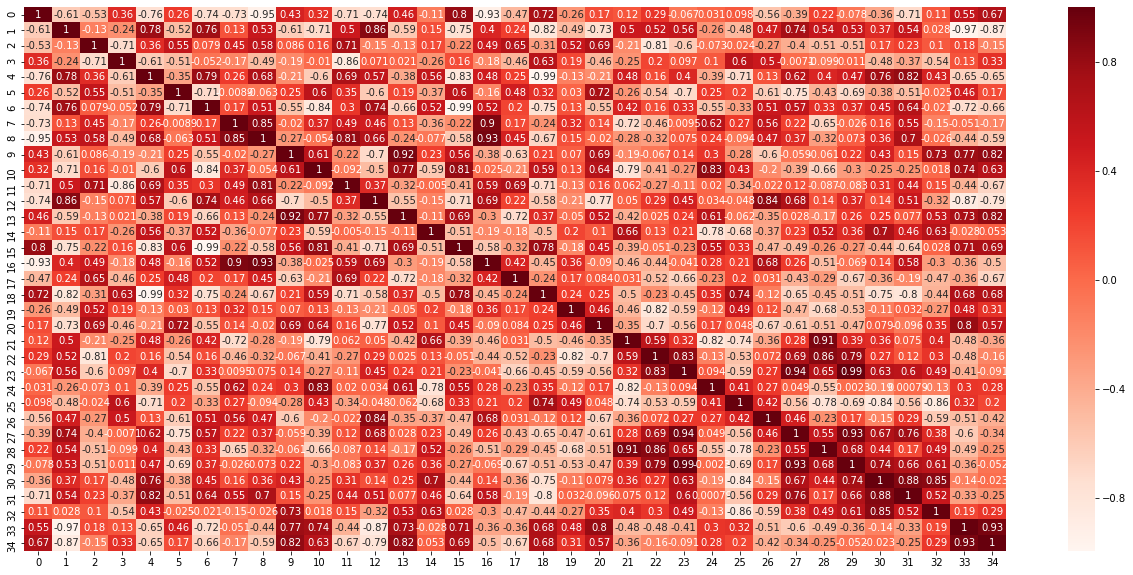

In [15]:
#checking for correlation between different features in the final dataset
import seaborn as sns
plt.figure(figsize=(22,10))
cor = df_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
#creating the target variable as expected based on ground truth
label = []
sec = seconds
for i in np.arange(0,seconds,60):
    if sec > 60:
        label.append(1)
    else:
        label.append(0)
    sec = sec - 60
label

[1, 1, 1, 1, 1, 0]

In [17]:
#converting the list into a DataFrame
df_label = DataFrame (label,columns=['Label'])
df_label

,Label
0,1
1,1
2,1
3,1
4,1
5,0


In [18]:
#Joining both Final Dataset with all the necessary features and the target variable based on the ground truth
df_final = pd.concat([df_final, df_label], ignore_index=True, axis = 1)
df_final

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-250.057144,87.098343,-7.937814,21.733318,-2.302378,3.553228,-11.419223,2.845475,-23.026539,-0.494685,...,0.545742,0.514215,0.532236,0.419860,0.457430,0.611020,0.475658,2502.336694,0.128517,1
1,-177.099152,83.776840,-18.977987,22.115139,-6.494556,4.274517,-22.442966,0.590565,-27.535898,3.763030,...,0.518633,0.570491,0.604697,0.528220,0.495347,0.594039,0.585834,2662.991621,0.164778,1
2,-216.099609,85.200005,-4.300701,17.350311,-3.985563,14.017991,-23.213362,1.999225,-22.826685,0.901367,...,0.478358,0.475825,0.534474,0.383485,0.412277,0.483843,0.521462,2542.046700,0.119103,1
3,-130.297974,78.436333,-17.287872,22.287884,-9.304369,8.157413,-22.811209,-13.920866,-34.999599,0.850910,...,0.459866,0.464823,0.652489,0.412376,0.365764,0.315723,0.510561,2654.689117,0.152952,1
4,-173.137177,68.881714,-4.621558,18.410896,-4.873506,10.773917,-23.759352,-3.486451,-28.697701,6.528072,...,0.421005,0.472341,0.565859,0.432615,0.544279,0.569180,0.672630,3082.289751,0.188774,1
5,-153.250031,59.880371,-10.119243,23.228222,-14.951353,12.388251,-30.381527,0.899631,-30.258043,3.296296,...,0.494849,0.412499,0.419786,0.329737,0.299831,0.322107,0.439158,3157.796534,0.192325,0


<h1>Splitting the final dataset into features and target variable</h1>

In [19]:
#splitting the dataset into features and class variable
features = df_final.iloc[:,:-1].values
y_act = df_final.iloc[:,-1].values
features

array([[-2.50057144e+02,  8.70983429e+01, -7.93781376e+00,
         2.17333183e+01, -2.30237770e+00,  3.55322766e+00,
        -1.14192228e+01,  2.84547544e+00, -2.30265388e+01,
        -4.94685054e-01, -1.56857948e+01, -2.16532135e+00,
        -5.31035042e+00, -6.38846302e+00, -1.07897425e+01,
        -5.88468027e+00, -9.39332104e+00, -4.52087307e+00,
        -9.25656605e+00, -4.13219023e+00,  5.14488443e+03,
         5.62782109e-01,  5.66754818e-01,  5.72452545e-01,
         4.87561941e-01,  5.64590216e-01,  5.45741916e-01,
         5.14214575e-01,  5.32236338e-01,  4.19859707e-01,
         4.57430184e-01,  6.11019790e-01,  4.75657552e-01,
         2.50233669e+03,  1.28517280e-01],
       [-1.77099152e+02,  8.37768402e+01, -1.89779873e+01,
         2.21151390e+01, -6.49455643e+00,  4.27451706e+00,
        -2.24429665e+01,  5.90565205e-01, -2.75358982e+01,
         3.76302981e+00, -1.32608042e+01, -3.23182559e+00,
        -7.15552282e+00, -1.44048917e+00, -1.40447903e+01,
        -1.09

<h1> Feature Scaling </h1>

In [20]:
#transforming the values in the features dataset to a common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_final_after = sc.fit_transform(features)
df_final_after

array([[-1.68722773e+00,  1.00906067e+00,  4.53546678e-01,
         4.04737499e-01,  1.12229363e+00, -1.35252672e+00,
         1.95612559e+00,  8.15005297e-01,  1.15605862e+00,
        -1.27183319e+00, -1.35035476e+00,  3.39114561e-01,
         1.43713549e+00, -1.40963945e+00,  7.13389190e-01,
        -1.96560715e+00,  1.50738516e+00,  6.28785936e-01,
        -9.52766205e-01,  1.18576093e+00, -8.48164436e-01,
         5.28915649e-02, -4.93991891e-01,  4.18876495e-03,
        -8.68394306e-01,  2.64528390e-01,  1.47741059e+00,
         6.02626343e-01, -2.68200222e-01,  3.59252345e-02,
         3.48655572e-01,  1.04803787e+00, -7.66613028e-01,
        -1.03002284e+00, -1.05794188e+00],
       [ 1.57370690e-01,  6.70038598e-01, -1.47005703e+00,
         5.80543031e-01,  1.17607306e-01, -1.16872379e+00,
        -1.88158975e-02,  4.23231426e-01,  8.43350039e-02,
         5.52140015e-01,  3.10703328e-01, -5.08193235e-01,
         7.87672997e-01,  1.09532472e+00, -4.12180382e-01,
         2.53

In [21]:
df_final_after.shape

(6, 35)

<h1> Clustering </h1>
<h3> K-Means Clustering </h3>

<h3> To find the optimal number of clusters - Elbow Method </h3>

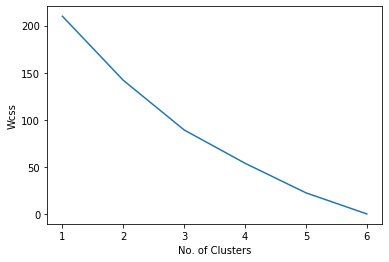

In [22]:
from sklearn.cluster import KMeans
Wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 0)
    kmeans.fit(df_final_after)
    Wcss.append(kmeans.inertia_)
plt.plot(range(1,7),Wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss')
plt.show()

<h3> Final clustering of the dataset, k = 3 </h3>
<p> No. of clusters = 3 </p>
<h3> Prediction of K-Means clustering </h3>

In [23]:

kmean = KMeans(n_clusters=3, init='k-means++', random_state = 0)
ykmeans = kmean.fit_predict(df_final_after)
ykmeans

array([1, 0, 1, 0, 0, 2], dtype=int32)

<h1> Visualization of Clusters and their centroids </h1>

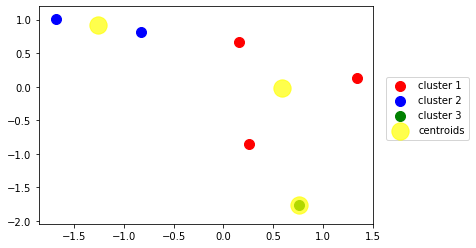

In [24]:
plt.scatter(df_final_after[ykmeans==0,0],df_final_after[ykmeans==0,1], s=100, c = 'red', label = 'cluster 1')
plt.scatter(df_final_after[ykmeans==1,0],df_final_after[ykmeans==1,1], s=100, c = 'blue', label = 'cluster 2')
plt.scatter(df_final_after[ykmeans==2,0],df_final_after[ykmeans==2,1], s=100, c = 'green', label = 'cluster 3')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids', alpha = 0.7)
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.show()

In [25]:
print("%.1f" % homogeneity_score(y_act, ykmeans))
print("%.4f" % v_measure_score(y_act, ykmeans))
print("%.4f" % completeness_score(y_act, ykmeans))

1.0
0.6164
0.4455


<h1> Task - 2 </h1>

<h1> Load the speaker textual data </h1>

In [31]:
#Read the speakers text
df = pd.read_excel("Part_2.xlsx")
df

,Text,Speaker
0,eight to one my guys really I'm here,1
1,missed anyone who's not here so budget,1
2,astute Kevin he's come down to just,1
3,observe today from upstairs,1
4,infrastructure something he can explain,1
...,...,...
106,we end up head over there pick up some,6
107,of the issues they have been without a,6
108,few days,6
109,mm-hm all right sounds good thanks guys,6


<h1> Data Preprocessing </h1>

In [32]:
#removing the contractions and transforming it into 2 words.
def contraction(text):
    text['Text'] = text['Text'].str.lower()
    text['Text'] = text['Text'].replace(to_replace=r'ain\'t', value='am not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'aren\'t', value='are not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'can\'t', value='can not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'can\'t\'ve', value='can not have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'\'cause', value='because', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'could\'ve', value='could have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'couldn\'t', value='could not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'couldn\'t\'ve', value='could not have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'didn\'t', value='did not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'doesn\'t', value='does not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'don\'t', value='do not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'hadn\'t', value='had not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'hadn\'t\'ve', value='had not have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'hasn\'t', value='has not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'haven\'t', value='have not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'he\'d', value='he had', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'he\'d\'ve', value='he would have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'he\'ll', value='he will', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'he\'ll\'ve', value='he will have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'he\'s', value='he has', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'how\'d', value='how did', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'how\'d\'y', value='how do you', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'how\'ll', value='how will', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'how\'s', value='how has', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'i\'d', value='I had', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'i\'d\'ve', value='I would have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'i\'ll', value='I shall', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'i\'ll\'ve', value='I shall have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'i\'m', value='I am', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'im ', value='I am', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'i\'ve', value='I have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'isn\'t', value='is not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'it\'d', value='it had', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'it\'d\'ve', value='it would have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'it\'ll', value='it shall', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'it\'ll\'ve', value='it shall have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'it\'s', value='it has', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'let\'s', value='let us', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'ma\'am', value='madam', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'mayn\'t', value='may not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'might\'ve', value='might have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'mightn\'t', value='might not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'mightn\'t\'ve', value='might not have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'must\'ve', value='must have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'mustn\'t', value='must not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'mustn\'t\'ve', value='must not have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'needn\'t', value='need not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'needn\'t\'ve', value='need not have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'o\'clock', value='of the clock', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'oughtn\'t', value='ought not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'oughtn\'t\'ve', value='ought not have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'shan\'t', value='shall not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'sha\'n\'t', value='shall not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'shan\'t\'ve', value='shall not have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'she\'d', value='she had', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'she\'d\'ve', value='she would have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'she\'ll', value='she shall', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'she\'ll\'ve', value='she shall have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'she\'s', value='she has', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'should\'ve', value='should have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'shouldn\'t', value='should not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'shouldn\'t\'ve', value='should not have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'so\'ve', value='so have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'so\'s', value='so as', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'that\'d', value='that would', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'that\'d\'ve', value='that would have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'that\'s', value='that has', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'there\'d', value='there had', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'there\'d\'ve', value='there would have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'there\'s', value='there has', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'they\'d', value='they had', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'they\'d\'ve', value='they would have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'they\'ll', value='they shall', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'they\'ll\'ve', value='they shall have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'they\'re', value='they are', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'they\'ve', value='they have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'to\'ve', value='to have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'wasn\'t', value='was not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'we\'d', value='we had', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'we\'d\'ve', value='we would have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'we\'ll', value='we will', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'we\'ll\'ve', value='we will have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'we\'re', value='we are', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'we\'ve', value='we have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'weren\'t', value='were not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'what\'ll', value='what shall', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'what\'ll\'ve', value='what shall have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'what\'re', value='what are', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'what\'s', value='what has', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'what\'ve', value='what have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'when\'s', value='when has', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'when\'ve', value='when have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'where\'d', value='where did', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'where\'s', value='where has', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'where\'ve', value='where have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'who\'ll', value='who shall', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'who\'ll\'ve', value='who shall have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'who\'s', value='who has', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'who\'ve', value='who have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'why\'s', value='why has', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'why\'ve', value='why have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'will\'ve', value='will have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'won\'t', value='will not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'won\'t\'ve', value='will not have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'would\'ve', value='would have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'wouldn\'t', value='would not', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'wouldn\'t\'ve', value='would not have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'y\'all', value='you all', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'y\'all\'d', value='you all would', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'y\'all\'d\'ve', value='you all would have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'y\'all\'re', value='you all are', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'y\'all\'ve', value='you all have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'you\'d', value='you had', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'you\'d\'ve', value='you would have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'you\'ll', value='you shall', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'you\'ll\'ve', value='you shall have', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'you\'re', value='you are', regex=True)
    text['Text'] = text['Text'].replace(to_replace=r'you\'ve', value='you have', regex=True)
    return(text)

In [33]:
#calling the contraction functions to perform decontraction
df_text = contraction(df)
df_text

,Text,Speaker
0,eight to one my guys really I am here,1
1,missed anyone who has not here so budget,1
2,astute kevin he has come down to just,1
3,observe today from upstairs,1
4,infrastructure something he can explain,1
...,...,...
106,we end up head over there pick up some,6
107,of the issues they have been without a,6
108,few days,6
109,mm-hm all right sounds good thanks guys,6


<h3> Lemmatization </h3>

In [35]:
#Lemmatization of textual data
def Lemmatizaton(df):
    lemmatization = WordNetLemmatizer()
    for ind, text in enumerate(df['Text']):
        temp = []
        for word in str(text).split():
            word = word.strip()
            lemmatize_word = lemmatization.lemmatize(word)
            temp.append(lemmatize_word)
            df.loc[ind,'Text'] = str(" ".join(temp))
    return df

In [36]:
#Calling the function for lemmatization
df_text_final = Lemmatizaton(df_text)
df_text_final

,Text,Speaker
0,eight to one my guy really I am here,1
1,missed anyone who ha not here so budget,1
2,astute kevin he ha come down to just,1
3,observe today from upstairs,1
4,infrastructure something he can explain,1
...,...,...
106,we end up head over there pick up some,6
107,of the issue they have been without a,6
108,few day,6
109,mm-hm all right sound good thanks guy,6


<h1> Word Embedding </h1>

<h3> Glove </h3>

In [37]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file="glove.6B.200d.txt", word2vec_output_file="glove.6B.200d.txt.word2vec")

(400000, 200)

In [38]:
# load the Stanford GloVe model
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("glove.6B.200d.txt.word2vec",binary=False)

In [40]:
#Converting the words into vectors
def feature(df):
    ab =[]
    for i in df['Text']:
        bc = []
        for j in i.split():
            try:
                if j in glove_model.wv.vocab:
                    x = glove_model[j]
                    bc.append(x)
                    y = np.array(bc)
            except:
                pass
        ab.append(np.mean(y))
    return ab

In [58]:
#calling the features function
df_text_final_feat_1 = feature(df_text_final)
df_text_final_feat_1

[0.01713509,
 0.012513291,
 0.019718274,
 0.02284589,
 0.039750017,
 -0.0021877894,
 0.014655364,
 0.023601238,
 0.015181149,
 0.01066103,
 0.032497883,
 0.01771583,
 0.0291894,
 0.0164102,
 0.018745743,
 0.02217228,
 0.01595009,
 0.022219168,
 0.02203912,
 0.024368567,
 0.025251547,
 0.026445778,
 0.027826812,
 0.02760912,
 0.010569931,
 0.019560048,
 0.021409689,
 0.019138815,
 0.032548025,
 0.016289607,
 0.01791734,
 0.026467953,
 0.014315189,
 0.036123853,
 0.015544265,
 0.027868882,
 0.017617436,
 0.01560835,
 0.02921686,
 0.0116427485,
 0.021975392,
 0.01876561,
 0.009862043,
 0.025268542,
 0.04382712,
 0.0215921,
 0.03244926,
 0.03239705,
 -0.0019550228,
 0.029681353,
 0.016338151,
 0.0125923455,
 0.0167319,
 0.02201849,
 0.031023715,
 0.011886691,
 0.026093017,
 0.018610198,
 0.026509658,
 -0.007536448,
 0.0051759467,
 0.031668976,
 0.019348258,
 0.018688781,
 0.032536328,
 0.029813504,
 0.038530197,
 0.02715109,
 0.032518283,
 0.014821309,
 0.029999806,
 0.03535365,
 0.0418683

In [59]:
#displaying the values of one feature - Glove
df_text_final_feat_1_data = pd.DataFrame({'features': df_text_final_feat_1})
df_text_final_feat_1_data = pd.DataFrame(df_text_final_feat_1_data.features.values, index = df_text_final_feat_1_data.index )
df_text_final_feat_1_data

,0
0,0.017135
1,0.012513
2,0.019718
3,0.022846
4,0.039750
...,...
106,0.026429
107,0.021308
108,0.032436
109,0.010826


<h3> Bag of Words </h3>

In [46]:
#implementing Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
df_text_final_feat_2 = cv.fit_transform(df_text_final['Text']).toarray().mean(axis=1)

In [47]:
#displaying the values of one feature
df_text_final_feat_2_data = pd.DataFrame({'features2': df_text_final_feat_2})
df_text_final_feat_2_data_2 = pd.DataFrame(df_text_final_feat_2_data.features2.values, index = df_text_final_feat_2_data.index )

In [48]:
#concatenating all the dataframes with different features in it
df_final_text_final_final = pd.concat([df_text_final_feat_1_data_1,df_text_final_feat_2_data_2], ignore_index=True, axis = 1)
df_final_text_final_final = np.array(df_final_text_final_final)

<h3> KMeans Clustering </h3>

In [49]:
#applying KMeans clustering on the created dataset with features
kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 0)
ykmeans2 = kmeans.fit_predict(df_final_text_final_final)
ykmeans2

array([1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0,
       0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1], dtype=int32)

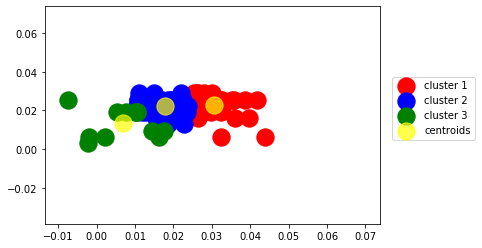

In [54]:
#displaying the KMeans clustering of data
plt.scatter(df_final_text_final_final[ykmeans2==0,0],df_final_text_final_final[ykmeans2==0,1], s=300, c = 'red', label = 'cluster 1')
plt.scatter(df_final_text_final_final[ykmeans2==1,0],df_final_text_final_final[ykmeans2==1,1], s=300, c = 'blue', label = 'cluster 2')
plt.scatter(df_final_text_final_final[ykmeans2==2,0],df_final_text_final_final[ykmeans2==2,1], s=300, c = 'green', label = 'cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids', alpha = 0.7)
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.show()

In [55]:
#creating dataframe each cluster by labelling
df_text_final_data_y = pd.DataFrame({'label': ykmeans2})
df_text_final_data_y_final = pd.DataFrame(df_text_final_data_y.label.values, index = df_text_final_data_y.index )
df_text_final_data_y_final

,0
0,1
1,1
2,1
3,1
4,0
...,...
106,0
107,1
108,0
109,1


In [56]:
#concatenating all the dataframes with different features and also the cluster label
df_final_text_final_final_final = pd.concat([df_text_final,df_text_final_data_y_final], ignore_index=True, axis = 1)
df_final_text_final_final_final

,0,1,2
0,eight to one my guy really I am here,1,1
1,missed anyone who ha not here so budget,1,1
2,astute kevin he ha come down to just,1,1
3,observe today from upstairs,1,1
4,infrastructure something he can explain,1,0
...,...,...,...
106,we end up head over there pick up some,6,0
107,of the issue they have been without a,6,1
108,few day,6,0
109,mm-hm all right sound good thanks guy,6,1


In [57]:
#renaming the column of the dataframe
df_final_text_final_final_final_1 = df_final_text_final_final_final.rename(columns={0: "Text", 1: "Speaker", 2: "Cluster"})
df_final_text_final_final_final_1

,Text,Speaker,Cluster
0,eight to one my guy really I am here,1,1
1,missed anyone who ha not here so budget,1,1
2,astute kevin he ha come down to just,1,1
3,observe today from upstairs,1,1
4,infrastructure something he can explain,1,0
...,...,...,...
106,we end up head over there pick up some,6,0
107,of the issue they have been without a,6,1
108,few day,6,0
109,mm-hm all right sound good thanks guy,6,1
